<a href="https://colab.research.google.com/github/moskierko/gra_snake/blob/main/perceptron_Oskierko_Martyna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

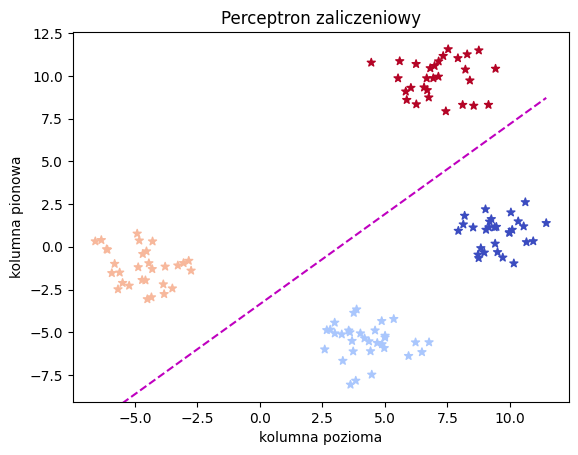

In [44]:
#Import bibliotek
import numpy as np
import matplotlib.pyplot as plt

#Przygotowanie danych
from sklearn.model_selection import train_test_split
from sklearn import datasets

#Przygotowanie etykiet
y = np.where(y == 0, -3, 3)


class Perceptron:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 3

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._unit_step_func(linear_output)

                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self._unit_step_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 3, 0)


X, y = datasets.make_blobs(n_samples=200, n_features=4, centers=4, cluster_std=1.04, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=200)

p = Perceptron(learning_rate=0.03, n_iters=3000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='*', c=y_train, cmap='coolwarm')

# Plot the decision boundary
x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], 'm--')

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 1, ymax + 1])
ax.set_title('Perceptron zaliczeniowy')
ax.set_xlabel('kolumna pozioma')
ax.set_ylabel('kolumna pionowa')

plt.show()
